In [8]:
import numpy as np
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Convolution2D as Conv2D
from keras.utils import np_utils
from tensorflow.keras.utils import img_to_array
from keras import models
import os
import  cv2
import matplotlib.pyplot as plt

LOADING Data

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

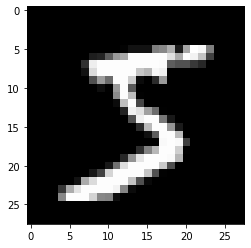

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='gray')

RESHAPING THE DATA

In [7]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

ONE_HOT ENCODING

In [8]:
num_of_classes = 10
y_train = np_utils.to_categorical(y_train,num_of_classes)
y_test = np_utils.to_categorical(y_test,num_of_classes)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

 **MODEL BUILDING**

Creating Model (Add CNN Layers)

In [24]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(28, kernel_size=(3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs=20,batch_size=64)

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.6157 - accuracy: 0.8961
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1239 - accuracy: 0.9656
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0970 - accuracy: 0.9722
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0839 - accuracy: 0.9766
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0743 - accuracy: 0.9794
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0729 - accuracy: 0.9805
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0669 - accuracy: 0.9815
Epoch 8/20
938/938 [==============================] - 3s 4ms/step - loss: 0.0695 - accuracy: 0.9823
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0583 - accuracy: 0.9840
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0588 - accuracy: 0.9848

COMPILING THE MODEL

In [25]:
model.compile(loss='categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])

Fitting the model

In [27]:
model.save("Trained_model")

In [30]:
!zip "Trained_Model.zip" -r "Trained_model"

  adding: Trained_model/ (stored 0%)
  adding: Trained_model/saved_model.pb (deflated 89%)
  adding: Trained_model/variables/ (stored 0%)
  adding: Trained_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: Trained_model/variables/variables.index (deflated 57%)
  adding: Trained_model/keras_metadata.pb (deflated 91%)
  adding: Trained_model/assets/ (stored 0%)


Observing the Metrics

In [31]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Loss& Accuracy)")
print(metrics)

Metrics(Loss& Accuracy)
[0.0683448314666748, 0.9872999787330627]


Predicting the model with 4 data samples

In [ ]:
prediction=model.predict(X_test[:4])
print(prediction)

In [ ]:
import numpy as np
print(np.argmax(prediction,axis=1))
print(y_test[:4])

Saving the Model

In [ ]:
model.save('trained_model')

In [4]:
trained_model=models.load_model("../input/Trained-Models/Trained_model")

2022-11-17 15:42:18.046609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 15:42:18.047611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 15:42:18.465061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 15:42:18.465978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 15:42:18.466739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [33]:
rows=100
columns=1

def load_image(PATH):
    image=cv2.imread(PATH,cv2.IMREAD_GRAYSCALE)#RGB to grayscale 
    image=cv2.resize(image,(28,28),interpolation=cv2.INTER_LINEAR)
    thresh,bw_image=cv2.threshold(image,127,255,cv2.THRESH_BINARY)   #converting grayscale to binary image
    bw_image=255-bw_image
    bw_image=img_to_array(bw_image)
    bw_image=np.asarray(bw_image)
    bw_image=np.expand_dims(bw_image,0)
    return bw_image

In [6]:
def predict_image(img):
    
    result=trained_model.predict(img)
    return np.argmax(result,axis=1)

In [34]:
#predicting the user inputs
Test_Path="../input/handwritten-digits/Isolated_Digits"

Test_Files=os.listdir(Test_Path)

i=1
for file in Test_Files:
    
    img=load_image(Test_Path+'/'+file)
    result=predict_image(img)
    i+=1
    print("filename:",file,"Predicted:",result)

filename: digit_5.jpeg Predicted: [5]
filename: digit_6.jpeg Predicted: [5]
filename: digit_8.jpeg Predicted: [8]
filename: digit_2.jpeg Predicted: [2]
filename: digit_7.jpeg Predicted: [7]
filename: digit_9.jpeg Predicted: [3]
filename: digit_4.jpeg Predicted: [8]
filename: digit_3.jpeg Predicted: [3]
filename: digit_1.jpeg Predicted: [1]
